<a href="https://colab.research.google.com/github/ilirsheraj/DUDL/blob/main/Chapter_05_CV_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import the necessary libraries
import torch
import torch.nn as nn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# splitting train test with sklearn
from sklearn.model_selection import train_test_split

# DataLoader
from torch.utils.data import DataLoader

## Manual Separation for Cross-Validation

In [3]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
len(iris)

150

In [5]:
# Convert data from pandas dataframe to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# transform species into numbers
labels = torch.zeros(len(data), dtype=torch.long)

# Labels for the species
labels[iris.species == "seosa"] = 0
labels[iris.species == "versicolor"] = 1
labels[iris.species == "virginica"] = 2

In [6]:
data[1:5,:]

tensor([[4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]])

In [7]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

### Separate into Train and Test Set

In [8]:
# define the proportion of training set
propTraining = 0.8
nTraining = int(len(labels)*propTraining)

# initialize a boolean vector to select data and their labels
traintestBool = np.zeros(len(labels), dtype=bool)

# One way to select samples
traintestBool[range(nTraining)] = True

traintestBool
# Very bad way, picks almost exclussively the last category

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,

In [9]:
# Test data balance
# remember, data were labeled as 0, 1 and 2. Average always expected to be 1
print("Average of full data")
print(torch.mean(labels.float()))
print()

print("Average of Training Data")
print(torch.mean(labels[traintestBool].float()))
print()

print("Average of Test Data")
print(torch.mean(labels[~traintestBool].float()))

Average of full data
tensor(1.)

Average of Training Data
tensor(0.7500)

Average of Test Data
tensor(2.)


In [10]:
# A better way to separate the dataset
traintestBool = np.zeros(len(labels), dtype=bool)
# print(traintestBool)
items2use4train = np.random.choice(range(len(labels)),nTraining, replace=False)
traintestBool[items2use4train] = True
traintestBool

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True, False, False,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,

In [11]:
# Now check the balance
print("Average of full data")
print(torch.mean(labels.float()))
print()

print("Average of Training Data")
print(torch.mean(labels[traintestBool].float()))
print()

print("Average of Test Data")
print(torch.mean(labels[~traintestBool].float()))

Average of full data
tensor(1.)

Average of Training Data
tensor(0.9333)

Average of Test Data
tensor(1.2667)


In [12]:
# Create the ANN Model with single hidden layer
ANNiris = nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,3),
    )

# loss function
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

In [13]:
# Check data shape
# Entire dataset
print(data.shape)
print()

# Training Data
print(data[traintestBool,:].shape)
print()

# test set
print(data[~traintestBool, :].shape)

torch.Size([150, 4])

torch.Size([120, 4])

torch.Size([30, 4])


In [14]:
# Train the model
numepochs = 1000

losses = torch.zeros(numepochs)
ongoingAcc = []

for epochi in range(numepochs):

    # forwad pass
    yHat = ANNiris(data[traintestBool,:])

    # Copute accuracy
    ongoingAcc.append(100*torch.mean((
        torch.argmax(yHat,axis=1) == labels[traintestBool]).float()))
    
    # Compute loss
    loss = lossfun(yHat, labels[traintestBool])
    losses[epochi] = loss

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [15]:
# Compute train and test accuracies

# Final forward pass using training data
predictions = ANNiris(data[traintestBool,:])
trainacc = 100*torch.mean((torch.argmax(predictions,axis=1)==labels[traintestBool]).float())

# Final forward pass using test data
predictions = ANNiris(data[~traintestBool,:])
testacc = 100*torch.mean((torch.argmax(predictions,axis=1)==labels[~traintestBool]).float())

In [16]:
print("Final train accuracy is {:.3f}%".format(trainacc))
print()
print("Final test accuracy is {:.3f}%".format(testacc))

Final train accuracy is 97.500%

Final test accuracy is 100.000%


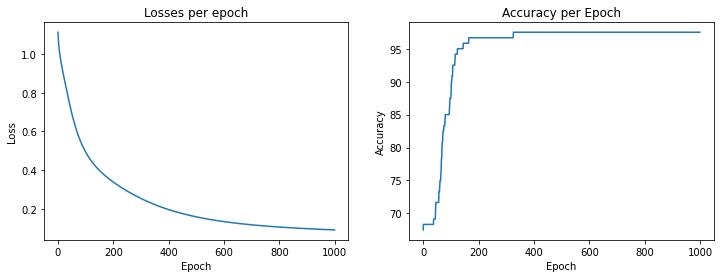

In [17]:
# Loss by epoch
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_title("Losses per epoch")

ax[1].plot(ongoingAcc)
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_title("Accuracy per Epoch")

plt.show()

## Cross-Validation with Scikitlearn

In [18]:
# How to use the train-test split
fakedata = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fakelabels = np.arange(10)>4
print(fakedata)
print()
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]

[False False False False False  True  True  True  True  True]


In [21]:
# Use sikitlearn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(
    fakedata, fakelabels, test_size=0.2) #, shuffle = False)

# Note the third parameter: it can be specified as test size or train size
# Read carefully

# print out the sizes
print("Train data size: {}".format(train_data.shape))
print()
print("Test data size: {}".format(test_data.shape))

# Print out the train/test data
print("Training Data:")
print(train_data)
print()
print("Test Data:")
print(test_data)
# Randomizing the order of the rows (shuffle = True by default) and train/testing data

Train data size: (8, 4)

Test data size: (2, 4)
Training Data:
[[ 41  42  43  44]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [ 71  72  73  74]
 [ 61  62  63  64]
 [ 21  22  23  24]
 [101 102 103 104]
 [ 11  12  13  14]]

Test Data:
[[51 52 53 54]
 [31 32 33 34]]


In [22]:
# Define the model
def createANewModel():

    # Define model architecture
    ANNiris = nn.Sequential(
        nn.Linear(4,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,3),
        )
    
    # Loss function
    lossfun = nn.CrossEntropyLoss()

    # Optimizer
    optimizer = torch.optim.SGD(ANNiris.parameters(), lr = 0.01)

    return ANNiris, lossfun, optimizer

In [23]:
# Define function to train the model

numepochs = 200
def trainTheModel(trainProp):
    # This leads to overfitting
    # separate train from test data
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=trainProp)

    # Initialize losses
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []

    # Loop overr the epochs
    for epochi in range(numepochs):


        # Forward pass and loss
        yHat = ANNiris(X_train)
        loss = lossfun(yHat, y_train)

        # Back Propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Compute the training accuracy
        trainAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y_train).float()).item())

        # test accuracy
        # Not leading to overfitting because backpropagation is only used in training set
        predlabels = torch.argmax(ANNiris(X_test), axis=1)
        testAcc.append(100*torch.mean((predlabels == y_test).float()).item())

    return trainAcc, testAcc

In [24]:
# Run the mmodel once to make sure its working
ANNiris, lossfun, optimizer = createANewModel()

# Train it
trainAcc, testAcc = trainTheModel(0.8)

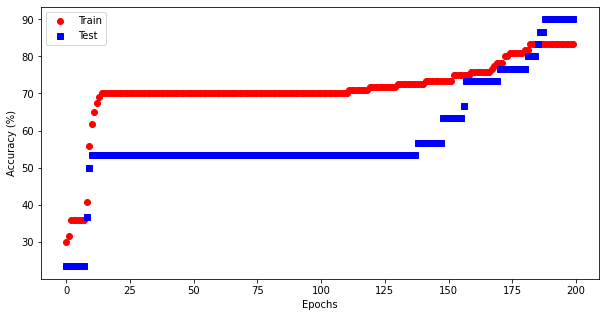

In [25]:
# Plot the results
fig = plt.figure(figsize=(10,5))
plt.plot(trainAcc, "ro")
plt.plot(testAcc, "bs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend(["Train", "Test"])
plt.show()

In [26]:
print(trainAcc[-1])
print()
print(testAcc[-1])

83.33333134651184

89.99999761581421


In [27]:
trainSetSizes = np.linspace(0.2, 0.95, 10)

allTrainAcc = np.zeros((len(trainSetSizes), numepochs))
allTestAcc = np.zeros((len(trainSetSizes), numepochs))

for i in range(len(trainSetSizes)):
    # Create the model
    ANNiris, lossfun, optimizer = createANewModel()

    # Train the model
    trainAcc, testAcc = trainTheModel(trainSetSizes[i])

    # store
    allTrainAcc[i,:] = trainAcc
    allTestAcc[i,:] = testAcc

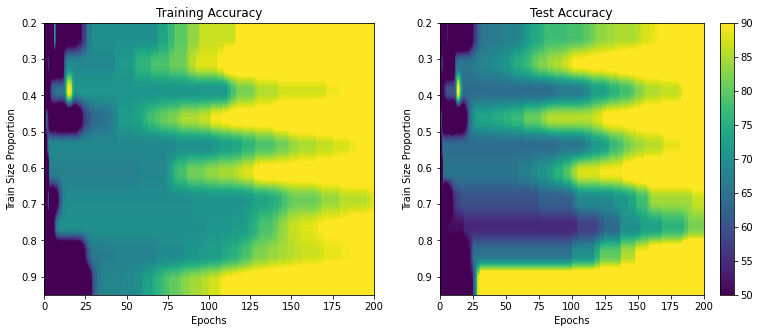

In [28]:
# Plot the stuff
fig,ax = plt.subplots(1,2, figsize=(13,5))
ax[0].imshow(allTrainAcc, aspect="auto", vmin=50, vmax=90,
             extent=[0,numepochs,trainSetSizes[-1], trainSetSizes[0]])
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Train Size Proportion")
ax[0].set_title("Training Accuracy")

p = ax[1].imshow(allTestAcc, aspect="auto", vmin=50, vmax=90,
             extent=[0,numepochs,trainSetSizes[-1], trainSetSizes[0]])
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Train Size Proportion")
ax[1].set_title("Test Accuracy")
fig.colorbar(p, ax=ax[1])
plt.show()

## Cross-Validation - DataLoader

In [29]:
# Create fakedata
fakedata = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fakelabels = np.arange(10)>4
print(fakedata)
print()
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]

[False False False False False  True  True  True  True  True]


In [34]:
np.tile(np.array([1,2,3,4]),(10,1))

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [38]:
np.tile(10*np.arange(1,11),(4,1)).T

array([[ 10,  10,  10,  10],
       [ 20,  20,  20,  20],
       [ 30,  30,  30,  30],
       [ 40,  40,  40,  40],
       [ 50,  50,  50,  50],
       [ 60,  60,  60,  60],
       [ 70,  70,  70,  70],
       [ 80,  80,  80,  80],
       [ 90,  90,  90,  90],
       [100, 100, 100, 100]])

In [39]:
# DataLoader Object
fakedataLrd = DataLoader(fakedata, shuffle=True)
print(fakedataLrd)
print(fakedataLrd.batch_size)

1


In [40]:
# Iterate through the data
for i, oneSample in enumerate(fakedataLrd):
    print(i, oneSample, oneSample.shape)

0 tensor([[61, 62, 63, 64]]) torch.Size([1, 4])
1 tensor([[21, 22, 23, 24]]) torch.Size([1, 4])
2 tensor([[81, 82, 83, 84]]) torch.Size([1, 4])
3 tensor([[101, 102, 103, 104]]) torch.Size([1, 4])
4 tensor([[51, 52, 53, 54]]) torch.Size([1, 4])
5 tensor([[11, 12, 13, 14]]) torch.Size([1, 4])
6 tensor([[41, 42, 43, 44]]) torch.Size([1, 4])
7 tensor([[71, 72, 73, 74]]) torch.Size([1, 4])
8 tensor([[91, 92, 93, 94]]) torch.Size([1, 4])
9 tensor([[31, 32, 33, 34]]) torch.Size([1, 4])


In [42]:
# from torch.utils.data import TensorDataset
# Since the data is shuffled, we need to create a dataset that contains the labels
fakeDataset = torch.utils.data.TensorDataset(torch.Tensor(fakedata), torch.Tensor(fakelabels))
fakeDataset.tensors
# fakeDataset = TensorDataset(torch.Tensor(fakedata), torch.Tensor(fakelabels))
# from torch.utils.data import DataLoader, TensorDataset
# call TensorDataset directly, no need to add torch.utils.data
# Tupple of data and labels

(tensor([[ 11.,  12.,  13.,  14.],
         [ 21.,  22.,  23.,  24.],
         [ 31.,  32.,  33.,  34.],
         [ 41.,  42.,  43.,  44.],
         [ 51.,  52.,  53.,  54.],
         [ 61.,  62.,  63.,  64.],
         [ 71.,  72.,  73.,  74.],
         [ 81.,  82.,  83.,  84.],
         [ 91.,  92.,  93.,  94.],
         [101., 102., 103., 104.]]),
 tensor([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]))

In [43]:
# Now create another data loader with numeric data and the label
fakedataLrd = DataLoader(fakeDataset, shuffle=True)

# iterate through the data again and print data with  the label
for i, lab in fakedataLrd:
    print(i, lab)

tensor([[81., 82., 83., 84.]]) tensor([1.])
tensor([[91., 92., 93., 94.]]) tensor([1.])
tensor([[51., 52., 53., 54.]]) tensor([0.])
tensor([[71., 72., 73., 74.]]) tensor([1.])
tensor([[21., 22., 23., 24.]]) tensor([0.])
tensor([[11., 12., 13., 14.]]) tensor([0.])
tensor([[101., 102., 103., 104.]]) tensor([1.])
tensor([[41., 42., 43., 44.]]) tensor([0.])
tensor([[31., 32., 33., 34.]]) tensor([0.])
tensor([[61., 62., 63., 64.]]) tensor([1.])


In [44]:
# Split data with sklearn: The actual procedure
train_data, test_data, train_labels, test_labels = train_test_split(fakedata,fakelabels, train_size=0.8)

# Convert them into PyTorch Datasets separately
train_data = torch.utils.data.TensorDataset(torch.Tensor(train_data), torch.Tensor(train_labels))

test_data = torch.utils.data.TensorDataset(torch.Tensor(test_data), torch.Tensor(test_labels))

# Translate into dataloader objects
train_loader = DataLoader(train_data, batch_size=4)
test_loader = DataLoader(test_data)

In [46]:
train_data.tensors

(tensor([[ 61.,  62.,  63.,  64.],
         [ 41.,  42.,  43.,  44.],
         [ 21.,  22.,  23.,  24.],
         [ 51.,  52.,  53.,  54.],
         [ 91.,  92.,  93.,  94.],
         [ 11.,  12.,  13.,  14.],
         [ 31.,  32.,  33.,  34.],
         [101., 102., 103., 104.]]), tensor([1., 0., 0., 0., 1., 0., 0., 1.]))

In [47]:
test_data.tensors

(tensor([[81., 82., 83., 84.],
         [71., 72., 73., 74.]]), tensor([1., 1.]))

In [48]:
train_loader

In [51]:
# Check the contents
print("Training Data")
for batch, label in train_loader:
    print(batch, label)
    print()

print("-"*50)

print("Testing Data")
for batch, label in test_loader:
    print(batch, label)
    print()

# Because of batch size 4, train data divide into two pieces
# Data is shuffled as well

Training Data
tensor([[61., 62., 63., 64.],
        [41., 42., 43., 44.],
        [21., 22., 23., 24.],
        [51., 52., 53., 54.]]) tensor([1., 0., 0., 0.])

tensor([[ 91.,  92.,  93.,  94.],
        [ 11.,  12.,  13.,  14.],
        [ 31.,  32.,  33.,  34.],
        [101., 102., 103., 104.]]) tensor([1., 0., 0., 1.])

--------------------------------------------------
Testing Data
tensor([[81., 82., 83., 84.]]) tensor([1.])

tensor([[71., 72., 73., 74.]]) tensor([1.])



### Use Real Data (Iris)

In [54]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [58]:
data[0:5,:]

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]])

In [59]:
# Using the Iris dataset
# Use sikitlearn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size=0.8)

# Convert to pytorch dataset (they are already tensors)
train_data = torch.utils.data.TensorDataset(train_data, train_labels)
test_data = torch.utils.data.TensorDataset(test_data, test_labels)

# Convert them to dataloader objects
train_loader = DataLoader(train_data, shuffle=True, batch_size=12)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [60]:
# Check sizes of data batches
for x,y in train_loader:
    print(x.shape, y.shape)

print("-"*50)
print(x,y)

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
--------------------------------------------------
tensor([[6.7000, 3.0000, 5.2000, 2.3000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.7000, 3.0000, 5.0000, 1.7000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [7.6000, 3.0000, 6.6000, 2.1000],
        [5.1000, 3.8000, 1.9000, 0.4000],
        [5.8000, 2.8000, 5.1000, 2.4000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [5.8000, 2.6000, 4.0000, 1.2000],
        [5.4000, 3.7000, 1.5000, 0.2000]]) tensor([2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0])


In [61]:
# Do the same thing for test
for x,y in test_loader:
    print(x.shape, y.shape)

torch.Size([30, 4]) torch.Size([30])


In [62]:
# Now lets create the model
def createANewModel():

    # Define model architecture
    ANNiris = nn.Sequential(
        nn.Linear(4,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,3),
        )
    
    # Loss function
    lossfun = nn.CrossEntropyLoss()

    # Optimizer
    optimizer = torch.optim.SGD(ANNiris.parameters(), lr = 0.01)

    return ANNiris, lossfun, optimizer

In [63]:
# Now we train in minibatches
numepochs = 500
def trainTheModel():

    # Initialize losses
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []

    # Loop overr the epochs
    for epochi in range(numepochs):

        # Loop over training data batches
        batchAcc = []
        for X,y in train_loader:

            # Forward pass and loss
            yHat = ANNiris(X)
            loss = lossfun(yHat, y)

            # Back Propagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # training accuracy for a single batch
            batchAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)== y).float()).item())
            # end of batch
        
        # start with epochs loop
        trainAcc.append(np.mean(batchAcc))

        # Now test the accuracy
        # Extract X and Y from test dataloader
        # single minibatch, no need for for loop. It is single batch, but it is iterable
        X,y = next(iter(test_loader)) 
        predlabels = torch.argmax(ANNiris(X),axis=1)
        testAcc.append(100*torch.mean((predlabels==y).float()).item())

    return trainAcc, testAcc

In [64]:
# Run the model
ANNiris, lossfun, optimizer = createANewModel()

# Train it
trainAcc, testAcc = trainTheModel()

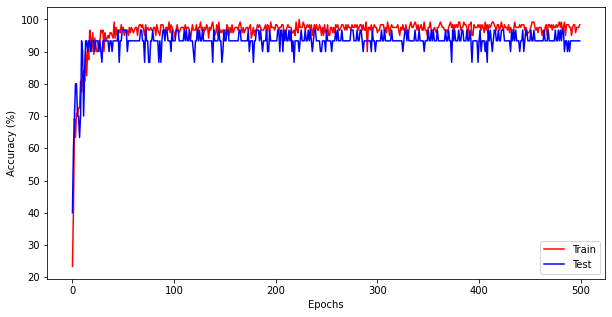

In [66]:
# Plot the results
fig = plt.figure(figsize=(10,5))
plt.plot(trainAcc, "r")
plt.plot(testAcc, "b")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend(["Train", "Test"])
plt.show()
# this is fucking crazy, accuracy above 90% within 50 epochs

## Split Data into Train, Devset and Test

In [ ]:
# Create fakedata
fakedata = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fakelabels = np.arange(10)>4
print(fakedata)
print()
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]

[False False False False False  True  True  True  True  True]


### Using train-test split

In [ ]:
# Define the sizes of partitions
# order is train, devset and test
partitions = [0.8, 0.1, 0.1]

# split the data
train_data, testTMP_data, train_labels, testTMP_labels = train_test_split(fakedata, fakelabels, train_size=partitions[0])

# Now split the TMP data
split = partitions[1]/np.sum(partitions[1:])
devset_data, test_data, devset_labels, test_labels = train_test_split(testTMP_data, testTMP_labels, train_size=split)

print("Training Data Size: {}".format(train_data.shape))
print("Devset Data Size: {}".format(devset_data.shape))
print("Test Data Size: {}".format(test_data.shape))
print()

# Print out the data
print("training Data")
print(train_data)
print()
print("Devset Data")
print(devset_data)
print()
print("Test Data")
print(test_data)

Training Data Size: (8, 4)
Devset Data Size: (1, 4)
Test Data Size: (1, 4)

training Data
[[ 91  92  93  94]
 [101 102 103 104]
 [ 81  82  83  84]
 [ 11  12  13  14]
 [ 41  42  43  44]
 [ 31  32  33  34]
 [ 61  62  63  64]
 [ 71  72  73  74]]

Devset Data
[[21 22 23 24]]

Test Data
[[51 52 53 54]]


### Split Manually Using Numpy

In [ ]:
# Define partitions
partitions = np.array([0.8,0.1,0.1])
print("Partition Proportions: {}".format(partitions))

Partition Proportions: [0.8 0.1 0.1]


In [ ]:
# Convert those into integers
partitionBnd = np.cumsum(partitions*len(fakelabels)).astype(int)
print("Partition Boundaries: {}".format(partitionBnd))

Partition Boundaries: [ 8  9 10]


In [ ]:
# Random indices
# first 8 will be train, next will be dev and the last one will be test set
randindices = np.random.permutation(range(len(fakelabels)))
print("Random Data Indices: {}".format(randindices))

Random Data Indices: [2 6 3 8 5 4 1 9 0 7]


In [ ]:
# Select the rows for training data
train_dataN = fakedata[randindices[:partitionBnd[0]],:]
train_labelsN = fakelabels[randindices[:partitionBnd[0]]]

# Select rows for devset
devset_dataN = fakedata[randindices[partitionBnd[0]:partitionBnd[1]],:]
devset_labelsN = fakelabels[randindices[partitionBnd[0]:partitionBnd[1]]]

# test data
test_dataN = fakedata[randindices[partitionBnd[1]:],:]
test_labelsN = fakelabels[randindices[partitionBnd[1]:]]

In [ ]:
print("Training Data Size: {}".format(train_dataN.shape))
print("Devset Data Size: {}".format(devset_dataN.shape))
print("Test Data Size: {}".format(test_dataN.shape))
print()

# Print out the data
print("training Data")
print(train_dataN)
print()
print("Devset Data")
print(devset_dataN)
print()
print("Test Data")
print(test_dataN)

Training Data Size: (8, 4)
Devset Data Size: (1, 4)
Test Data Size: (1, 4)

training Data
[[ 31  32  33  34]
 [ 71  72  73  74]
 [ 41  42  43  44]
 [ 91  92  93  94]
 [ 61  62  63  64]
 [ 51  52  53  54]
 [ 21  22  23  24]
 [101 102 103 104]]

Devset Data
[[11 12 13 14]]

Test Data
[[81 82 83 84]]


## Cross Validation on Regression

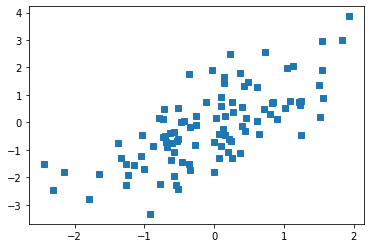

In [ ]:
# create the data and the model
N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)

# PLOT
plt.plot(x,y, "s");

In [ ]:
# Build a simple model
ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1),
    )

# Model parameters
learningRate = 0.05

lossfun = nn.MSELoss()

optimizer = torch.optim.SGD(ANNreg.parameters(), lr = learningRate)

In [ ]:
# Select data for teaining
trainidx = np.random.choice(range(N), int(0.8*N), replace=False)
trainbool = np.zeros(N,dtype=bool)
trainbool[trainidx] = True

# Show the sizes
print(x[trainbool].shape)
print(x[~trainbool].shape)

torch.Size([80, 1])
torch.Size([20, 1])


In [ ]:
# Train the model
numepochs = 500
for epochi in range(numepochs):

    # forward pass
    yHat = ANNreg(x[trainbool])

    # compute the loss
    loss = lossfun(yHat, y[trainbool])

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
# Compute losses on test set
predYtest = ANNreg(x[~trainbool])
# MSE 
testloss = (predYtest - y[~trainbool]).pow(2).mean()

print("Finat Train loss: {:.2f}".format(loss.detach()))
print("Finat Test loss: {:.2f}".format(testloss.detach()))

Finat Train loss: 0.79
Finat Test loss: 1.56


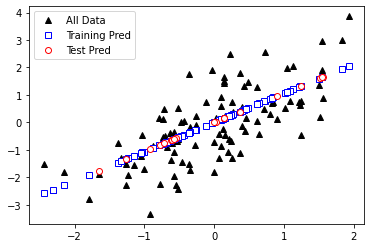

In [ ]:
# Plot the data
# predictions foR final training run
predYtrain = ANNreg(x[trainbool]).detach().numpy()

plt.plot(x,y, "k^", label = "All Data")
plt.plot(x[trainbool], predYtrain, "bs", markerfacecolor="w", label = "Training Pred")
plt.plot(x[~trainbool], predYtest.detach(), "ro", markerfacecolor="w", label="Test Pred")
plt.legend()
plt.show()